Import the required libraries



In [3]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [5]:
fifa=pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
pd.read_csv("fifa_+variable_information.csv")

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


# Getting Information about the Data Set

In [5]:
fifa.shape

(18207, 60)

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [7]:
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

# Dropping Unnecessary columns.

In [8]:
fifa=fifa.drop(['Photo'],axis=1)

In [9]:
fifa=fifa.drop(['Flag'],axis=1)

In [10]:
fifa=fifa.drop(['Club Logo'],axis=1)

In [11]:
fifa=fifa.drop(['Loaned From'],axis=1)

In [12]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# 'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively ,Convert to Float after getting rid of currency symbol and suffix.

# 'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively	,Convert to Float after getting rid of currency symbol and suffix.


# 'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.


In [13]:
# Creating a function to do above operation
def convert(val):
    if val[-1] == 'M':
        val = float(val[1:-1])*1000000
    elif val[-1] == "K": 
        val = float(val[1:-1])*1000
    else:
        val = float(val[1:])/1000
    return val

In [15]:
# Applying the function to the column using the apply function
fifa['Value'] = fifa['Value'].apply(convert)
fifa['Wage'] = fifa['Wage'].apply(convert)
fifa['Release Clause'] = fifa[fifa['Release Clause'].notnull()]['Release Clause'].apply(convert)
fifa.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


# 'Joined'	Year as a string, in some cases complete date as string	,Convert to int with only year

In [17]:
fifa['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [19]:
# Convert to int with only year
fifa['Joined'] = pd.DatetimeIndex(fifa['Joined']).year
fifa['Joined']=fifa[fifa['Joined'].notnull()]['Joined'].astype('int')
fifa.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


# 'Contract Valid Until'	Date as a string ,Convert to datetime type

In [20]:
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'])
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


# 'Height'	In inches with a quotation mark ,Convert to Float with decimal points

In [21]:
# Function to change height into cm and Converting to Float with decimal points
def change(ht):
    Ht = ht.split("'")
    H_inches = int(Ht[0]) * 12 + float(Ht[1])
    H_cm = 2.54*H_inches
    return H_cm
fifa['Height'] = fifa[fifa['Height'].notnull()]['Height'].apply(change)
fifa['Height'] = fifa['Height'].fillna((fifa['Height'].mean()))
fifa.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [22]:
fifa['Height']

0        170.18
1        187.96
2        175.26
3        193.04
4        180.34
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height, Length: 18207, dtype: float64

# 'Weight'	Contains the suffix lbs ,Remove the suffix and convert to float

In [23]:
# Remove the suffix and convert to float
fifa['Weight']=fifa.Weight.str.replace('lbs','')
fifa['Weight']=fifa['Weight'].astype(float)
fifa['Weight'] = fifa['Weight'].fillna((fifa['Weight'].mean()))
fifa.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [24]:
fifa.Weight.head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

# Checking for missing values .

In [28]:
fifa.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                         0
Weight                         0
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallContro

In [26]:
fifa.isnull().sum()/len(fifa)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      8.529686
Contract Valid Until        1.587302
Height                      0.000000
Weight                      0.000000
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
C

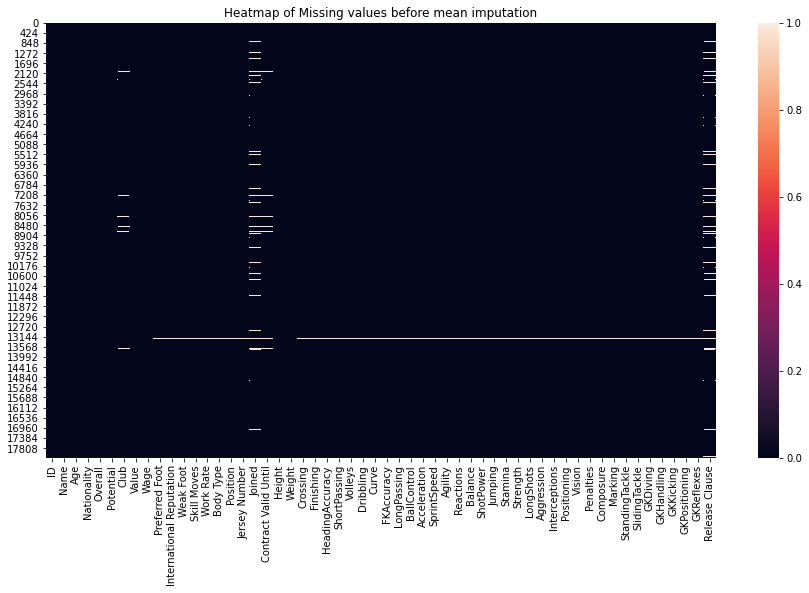

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(data=fifa.isna())
plt.title("Heatmap of Missing values before mean imputation")
plt.show()

So, the above heatmap shows the missing values in dataset which is represent in white colour.

# doing  mean imputation where necessary

In [29]:
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].mean())

In [30]:
fifa['Weight'] = fifa['Weight'].fillna(fifa['Weight'].mean())

In [31]:
fifa['International Reputation'] = fifa['International Reputation'].fillna(fifa['International Reputation'].mode()[0])

In [33]:
fifa['Joined'] = fifa['Joined'].fillna(fifa['Joined'].mode()[0])

In [32]:
fifa['Release Clause'] = fifa['Release Clause'].fillna(fifa['Release Clause'].mean())

In [35]:
fifa['Club'] = fifa['Club'].fillna(fifa['Club'].mode()[0])

In [36]:
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mode()[0])

In [37]:
fifa.isnull().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                        0
Wage                         0
Preferred Foot              48
International Reputation     0
Weak Foot                   48
Skill Moves                 48
Work Rate                   48
Body Type                   48
Position                    60
Jersey Number               60
Joined                       0
Contract Valid Until         0
Height                       0
Weight                       0
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSp

# 1.	Plot the distribution of Overall rating for all players. 

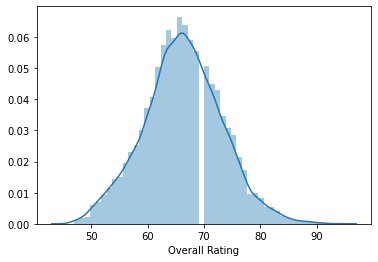

In [6]:
sns.distplot(fifa['Overall'])
plt.xlabel('Overall Rating')
plt.show()

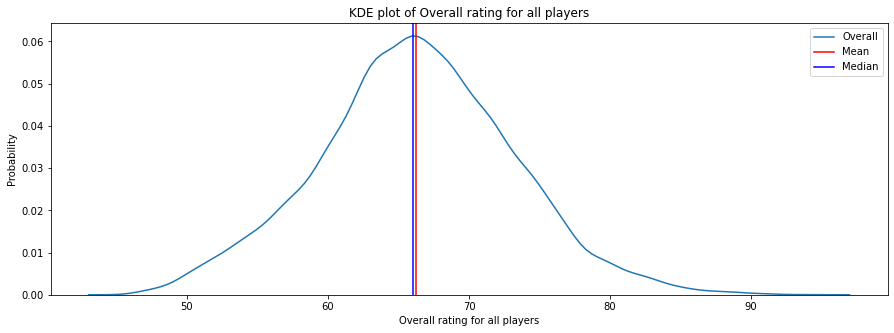

In [40]:
plt.figure(figsize = (15,5))
sns.kdeplot(data=fifa['Overall'])
plt.axvline(fifa['Overall'].mean(),color='red',label='Mean')
plt.axvline(fifa['Overall'].median(),color='blue',label='Median')
plt.title("KDE plot of Overall rating for all players")
plt.xlabel("Overall rating for all players")
plt.ylabel("Probability")
plt.legend()
plt.show()

# 2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

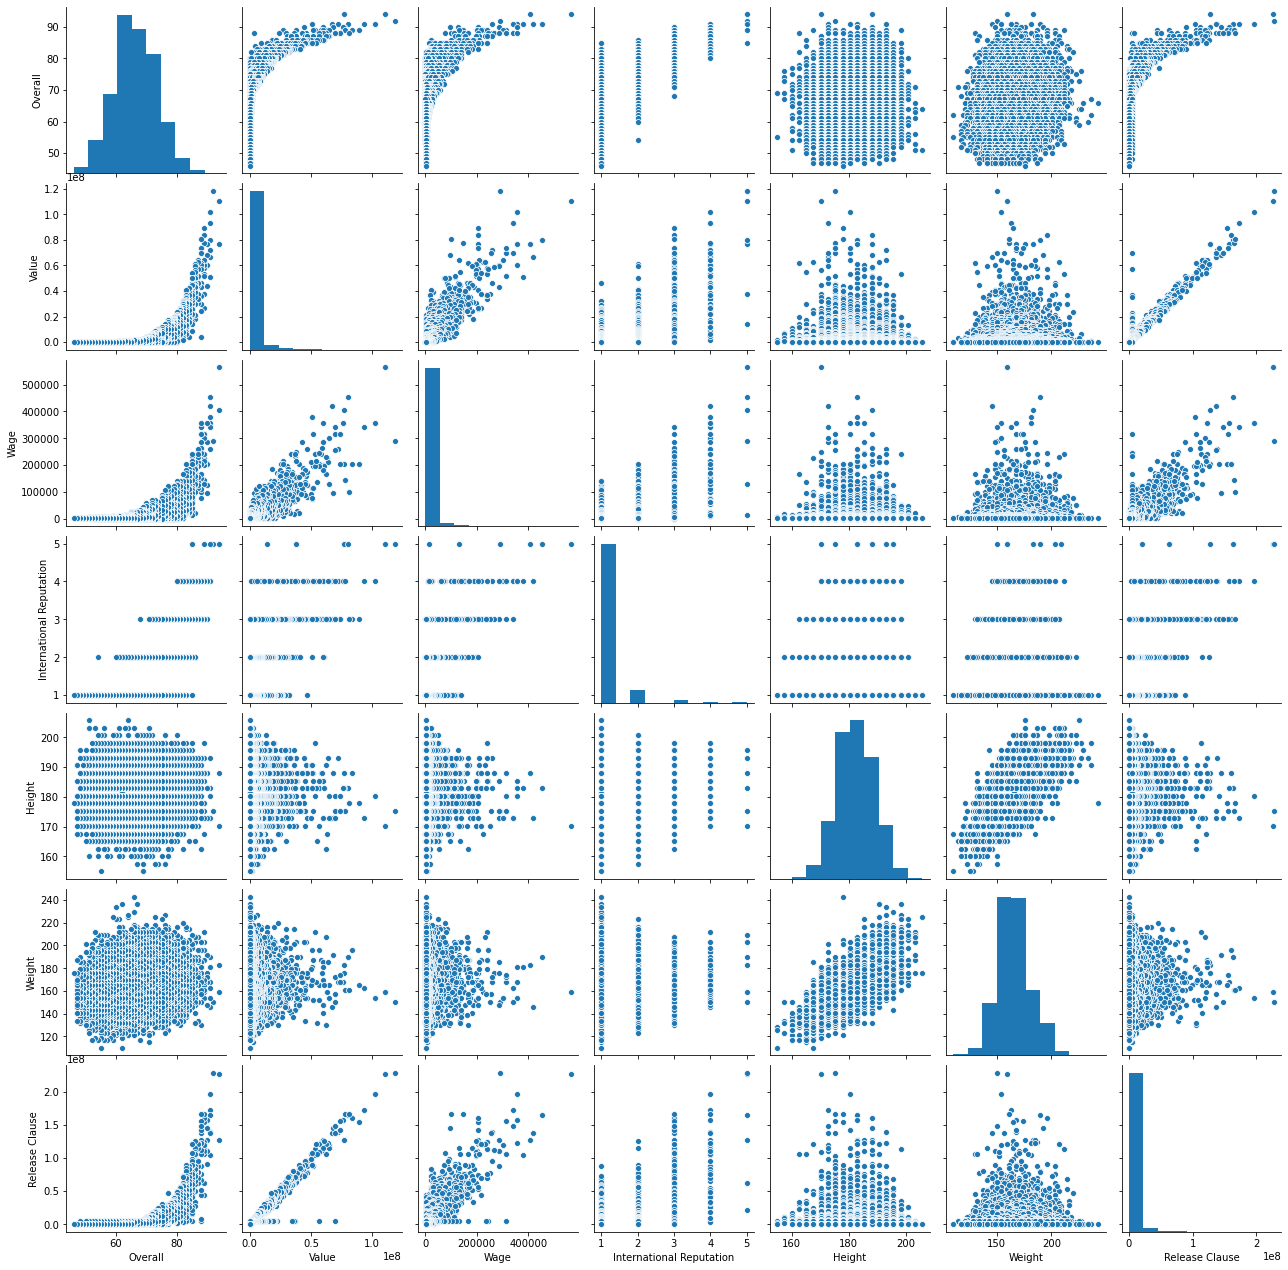

In [41]:
sns.pairplot(fifa,x_vars=['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause'],y_vars=['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause'])
plt.show()

# 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
 

a)	What would the average wage for this set of players be?

b) What is the average age?

c) Is there a correlation between the Overall rating and Value for these players?

In [42]:
df=fifa[fifa['Contract Valid Until']=='2020']

In [43]:
df1=df.sort_values(by=['Overall'],ascending=False).head(20)
df1

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


In [44]:
df1.to_csv('top20.csv')

In [45]:
df1['Age'].mean() 

30.65

In [46]:
df1['Wage'].mean() 

205450.0

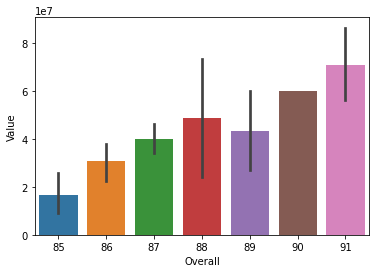

In [47]:
sns.barplot(x='Overall',y='Value',data=df1)
plt.show()

# 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

a)	Are there any players appearing in more than one Table. Please point out such players.

b) What is the average wage one can expect to pay for the top 5 in every position?

In [45]:
fifa.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [51]:
fifa_un=fifa.groupby('Position',group_keys=False)
new_fifa=fifa_un.apply(lambda x:x.sort_values('Overall',ascending=False))
new_fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
17,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
61,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
66,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
74,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0


In [52]:
fifa_name=fifa['Name'].value_counts()
fifa_name[fifa_name>1]

J. Rodríguez    11
Paulinho         8
J. Williams      7
R. Williams      7
J. Hernández     6
                ..
M. Howard        2
A. Hernández     2
S. Silva         2
T. Figueroa      2
C. Wood          2
Name: Name, Length: 762, dtype: int64

In [53]:
fifa_wage=pd.pivot_table(data=new_fifa,values='Wage',index='Position',aggfunc='mean')
fifa_wage

,Wage
Position,
CAM,10229.645094
CB,7704.724409
CDM,9315.400844
CF,10216.216216
CM,8340.746055
GK,6803.950617
LAM,26142.857143
LB,8726.928896
LCB,11498.456790


<Figure size 1080x576 with 0 Axes>

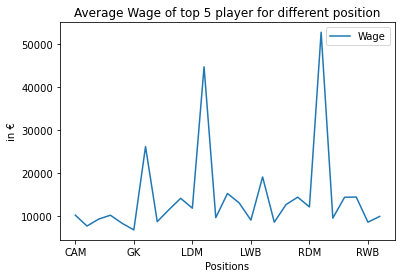

In [57]:
plt.figure(figsize=(15,8))
fifa_wage.plot()
plt.title("Average Wage of top 5 player for different position")
plt.xlabel("Positions")
plt.ylabel("in €")
plt.show()

In [46]:
fifa[fifa['Position']=='RF'].sort_values(by=['Overall'],ascending=False).head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45.0,135.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76.5
528,172114,D. Valeri,32,Argentina,80,80,Portland Timbers,11.5,12.0,Right,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,17.3
890,150516,L. Podolski,33,Germany,78,78,Vissel Kobe,6.5,11.0,Left,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8.1
1774,201313,C. Ciano,28,Italy,75,75,Frosinone,6.5,17.0,Left,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11.7


In [47]:
fifa[fifa['Position']=='ST'].sort_values(by=['Overall'],ascending=False).head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77.0,205.0,Right,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127.1
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83.5,205.0,Right,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160.7
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,64.5,300.0,Right,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119.3
36,173731,G. Bale,28,Wales,88,88,Real Madrid,60.0,355.0,Left,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,123.0


In [48]:
fifa[fifa['Position']=='LW'].sort_values(by=['Overall'],ascending=False).head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
30,197781,Isco,26,Spain,88,91,Real Madrid,73.5,315.0,Right,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,156.2
32,189242,Coutinho,26,Brazil,88,89,FC Barcelona,69.5,340.0,Right,...,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,147.7
29,198219,L. Insigne,27,Italy,88,88,Napoli,62.0,165.0,Right,...,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,105.4
55,222492,L. Sané,22,Germany,86,92,Manchester City,61.0,195.0,Left,...,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,125.1


In [49]:
fifa[fifa['Position']=='RW'].sort_values(by=['Overall'],ascending=False).head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
56,218667,Bernardo Silva,23,Portugal,86,91,Manchester City,59.5,180.0,Left,...,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,114.5
60,202652,R. Sterling,23,England,86,89,Manchester City,56.5,195.0,Right,...,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,108.8
79,220834,Marco Asensio,22,Spain,85,92,Real Madrid,54.0,215.0,Left,...,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,121.5
93,184941,A. Sánchez,29,Chile,85,85,Manchester United,37.5,215.0,Right,...,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,69.4
84,204485,R. Mahrez,27,Algeria,85,85,Manchester City,40.5,205.0,Left,...,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0,74.9


In [50]:
fifa[fifa['Position']=='LF'].sort_values(by=['Overall'],ascending=False).head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93.0,340.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89.0,205.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153.5
76,41,Iniesta,34,Spain,86,86,Vissel Kobe,21.5,21.0,Right,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,26.9
272,198164,Jonathan Viera,28,Spain,82,82,Beijing Sinobo Guoan FC,22.5,31.0,Right,...,80.0,56.0,68.0,55.0,16.0,16.0,9.0,14.0,9.0,49.5
1379,190577,S. Blanco,30,Argentina,76,76,Portland Timbers,7.5,9.0,Right,...,65.0,30.0,22.0,32.0,9.0,7.0,9.0,13.0,12.0,11.3
